In [170]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline


In [171]:
def neighbors(i, j, mat):
    N = mat.shape[0]
    return np.array([
        mat[(i+1)%N, j],
        mat[(i-1)%N, j],
        mat[i, (j+1)%N],
        mat[i, (j-1)%N]
    ])


def denergy(spin,neighbors,J):
    return 2*J*spin*sum(neighbors)

def hamiltonian(mat, J=1.5):
    N = mat.shape[0]
    E = 0
    for i in range(N):
        for j in range(N):
            s = mat[i, j]
            right = mat[i, (j+1)%N]
            down  = mat[(i+1)%N, j]
            E -= J * s * right
            E -= J * s * down
    return E

def metropolis_step(mat,T,J):
    N = mat.shape[0]
    for n in range(N**2):
        i, j = np.random.randint(0, N), np.random.randint(0, N)
        dE = denergy(mat[i,j],neighbors(i,j,mat),J)
        # rand_flip = np.random.rand() < np.exp(-dE / T)
        if dE<0 or np.random.rand() < np.exp(-dE / T):
            mat[i,j] = mat[i,j]*-1



In [172]:
N = 200  # Gittergröße
spins = np.ones((N, N), dtype=int)  # Alles +1

# Kreisparameter
center = N // 2
radius = N // 4

# Setze Spins im Kreis auf -1
for i in range(N):
    for j in range(N):
        if (i - center)**2 + (j - center)**2 < radius**2:
            spins[i, j] = -1
grid = spins


In [157]:
size = 50
grid = np.random.randint(2,size=(size,size))
grid[np.where(grid==0)] = -1

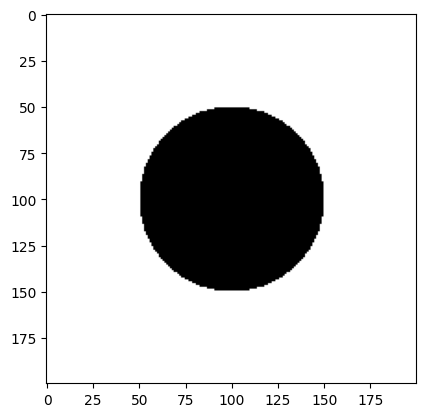

In [173]:
plt.imshow(grid,cmap='grey')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


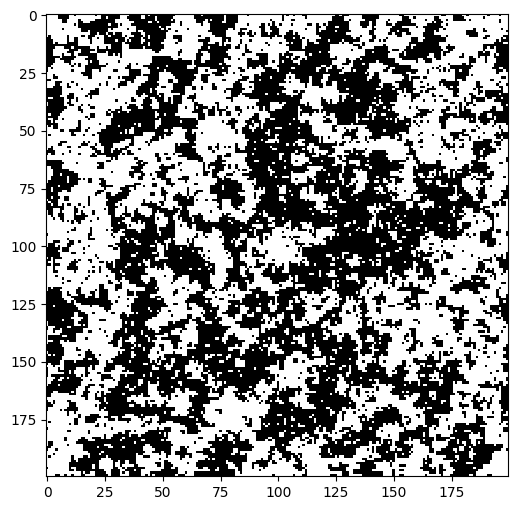

In [174]:
# ham = []
# for i in range(10):
#     ham.append(hamiltonian(grid))

#     metropolis_step(grid,2.5,1)
#     plt.imshow(grid,cmap='grey')
#     plt.show()
T = 2.5
J = 1
fig, ax = plt.subplots(figsize=(6, 6))
img = ax.imshow(grid, cmap="gray", interpolation="nearest", animated=True)

def update(frame):
    metropolis_step(grid, T,J)
    img.set_array(grid)
    return [img]
ani = FuncAnimation(fig, update, frames=200, interval=200, blit=True)
ani.save('ising_model_simulation.gif', writer='imagemagick', fps=10)
plt.show()

In [160]:
plt.plot(ham)

<IPython.core.display.Javascript object>